Calculate interactions

In [3]:
def interstitial_near_jump(elements_before, elements_after, rate_constant):
    from operator import add, sub, mod
    
    basis_points = [[0.0, 0.0, 0.0], #0
                [0.5, 0.5, 0.5], #1
                [0.25, 0.75, 0.75], #2
                [0.25, 0.25, 0.75],#3
                [0.5, 0.0, 0.5],#4
                [0.25, 0.75, 0.25],#5
                [0.0, 0.5, 0.5],#6
                [0.75, 0.75, 0.75],#7
                [0.5, 0.5, 0.0], #8
                [0.75, 0.25, 0.25],#9
                [0.75, 0.25, 0.75],#10
                [0.0, 0.0, 0.5],#11
                [0.75, 0.75, 0.25], #12
                [0.5, 0.0, 0.0], #13
                [0.25, 0.25, 0.25], #14
                [0.0, 0.5, 0.0]] #15
    direction1 = [[0.25, 0.25, 0.25],
                 [-0.25, -0.25, 0.25],
                 [-0.25, 0.25, -0.25],
                 [0.25, -0.25, -0.25]]
    direction2 = [[-0.25, -0.25, -0.25],
                 [-0.25, 0.25, 0.25],
                 [0.25, -0.25, 0.25],
                 [0.25, 0.25, -0.25]]
    
    basis_dir1 = [basis_points[1], basis_points[11], basis_points[13], basis_points[15]]
    basis_dir2 = [basis_points[3], basis_points[5], basis_points[7], basis_points[9]]
    
    processes = []
    for basis_idx, basis in enumerate(basis_points):
        if basis in basis_dir1:
            for direction in direction1:
                jump1 = list(map(add, basis, direction))
                coordinates = [basis, jump1]
                processes.append(KMCProcess(coordinates=coordinates,
                                 elements_before=elements_before,
                                 elements_after=elements_after,
                                 basis_sites=[basis_idx],
                                 rate_constant=rate_constant) )
        elif basis in basis_dir2:
            for direction in direction2:
                jump1 = list(map(add, basis, direction))
                coordinates = [basis, jump1]
                processes.append( KMCProcess(coordinates=coordinates,
                                 elements_before=elements_before,
                                 elements_after=elements_after,
                                 basis_sites=[basis_idx],
                                 rate_constant=rate_constant))
    return processes

In [6]:
def interstitial_far_jump(elements_before, elements_after, rate_constant):
    from operator import add, sub, mod

    basis_points = [[0.0, 0.0, 0.0],  # 0
                    [0.5, 0.5, 0.5],  # 1
                    [0.25, 0.75, 0.75],  # 2
                    [0.25, 0.25, 0.75],  # 3
                    [0.5, 0.0, 0.5],  # 4
                    [0.25, 0.75, 0.25],  # 5
                    [0.0, 0.5, 0.5],  # 6
                    [0.75, 0.75, 0.75],  # 7
                    [0.5, 0.5, 0.0],  # 8
                    [0.75, 0.25, 0.25],  # 9
                    [0.75, 0.25, 0.75],  # 10
                    [0.0, 0.0, 0.5],  # 11
                    [0.75, 0.75, 0.25],  # 12
                    [0.5, 0.0, 0.0],  # 13
                    [0.25, 0.25, 0.25],  # 14
                    [0.0, 0.5, 0.0]]  # 15
    direction1 = [[0.25, 0.25, 0.25],
                  [-0.25, -0.25, 0.25],
                  [-0.25, 0.25, -0.25],
                  [0.25, -0.25, -0.25]]
    direction2 = [[-0.25, -0.25, -0.25],
                  [-0.25, 0.25, 0.25],
                  [0.25, -0.25, 0.25],
                  [0.25, 0.25, -0.25]]

    basis_dir1 = [basis_points[1], basis_points[11], basis_points[13], basis_points[15]]
    basis_dir2 = [basis_points[3], basis_points[5], basis_points[7], basis_points[9]]

    processes = []
    for basis_idx, basis in enumerate(basis_points):
        if basis in basis_dir1:
            for jump1 in direction1:
                loc1 = list(map(add, basis, jump1))
                basis_mapping = list(map(mod, loc1, [1, 1, 1]))
                if basis_mapping in basis_dir1:
                    for jump2 in direction1:
                        loc2 = list(map(add, loc1, jump2))
                        if basis != loc2:
                            coordinates = [basis, loc2]
                            processes.append(KMCProcess(coordinates=coordinates,
                                                    elements_before=elements_before,
                                                    elements_after=elements_after,
                                                    basis_sites=[basis_idx],
                                                    rate_constant=rate_constant))
                elif basis_mapping in basis_dir2:
                    for jump2 in direction2:
                        loc2 = list(map(add, loc1, jump2))
                        if basis != loc2:
                            coordinates = [basis, loc2]
                            processes.append(KMCProcess(coordinates=coordinates,
                                                    elements_before=elements_before,
                                                    elements_after=elements_after,
                                                    basis_sites=[basis_idx],
                                                    rate_constant=rate_constant))
        elif basis in basis_dir2:
            for jump1 in direction2:
                loc1 = list(map(add, basis, jump1))
                basis_mapping = list(map(mod, loc1, [1, 1, 1]))
                if basis_mapping in basis_dir1:
                    for jump2 in direction1:
                        loc2 = list(map(add, loc1, jump2))
                        if basis != loc2:
                            coordinates = [basis, loc2]
                            processes.append(KMCProcess(coordinates=coordinates,
                                                    elements_before=elements_before,
                                                    elements_after=elements_after,
                                                    basis_sites=[basis_idx],
                                                    rate_constant=rate_constant))
                elif basis_mapping in basis_dir2:
                    for jump2 in direction2:
                        loc2 = list(map(add, loc1, jump2))
                        if basis != loc2:
                            coordinates = [basis, loc2]
                            processes.append(KMCProcess(coordinates=coordinates,
                                                    elements_before=elements_before,
                                                    elements_after=elements_after,
                                                    basis_sites=[basis_idx],
                                                    rate_constant=rate_constant))

    return processes

Calculate Diffusion Coefficient

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [26]:
append = '1_rate_constant_0_25'
data = np.loadtxt('msd%s.data'%append, skiprows=1)
data.shape

(100, 16)

In [27]:
cutoff = 20

time = data[cutoff:, 0]*1E-9
msd_x = data[cutoff:, 1]*1E-8
msd_y = data[cutoff:, 2]*1E-8
msd_z = data[cutoff:, 3]*1E-8
msd_xy = data[cutoff:, 4]*1E-8
msd_xz = data[cutoff:, 5]*1E-8
msd_yz = data[cutoff:, 6]*1E-8
msd_xyz = data[cutoff:, 7]*1E-8
std_x = data[cutoff:, 8]*1E-8
std_y = data[cutoff:, 9]*1E-8
std_z = data[cutoff:, 10]*1E-8
std_xy = data[cutoff:, 11]*1E-8
std_xz = data[cutoff:, 12]*1E-8
std_yz = data[cutoff:, 13]*1E-8
std_xyz = data[cutoff:, 14]*1E-8
n_eff = data[cutoff:, 15]*1E-8

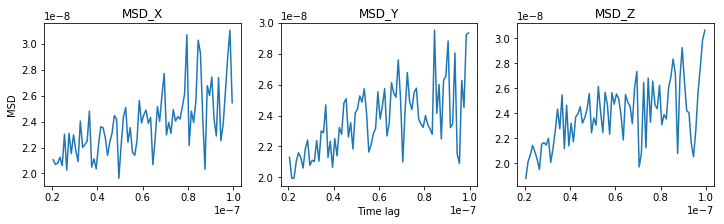

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(time, msd_x)
ax2.plot(time, msd_y)
ax3.plot(time, msd_z)

ax1.set_title('MSD_X')
ax2.set_title('MSD_Y')
ax3.set_title('MSD_Z')

ax2.set_xlabel('Time lag')
ax1.set_ylabel('MSD')

fig.set_size_inches((12, 3))

In [29]:
A = np.vstack([time, np.ones(len(time))]).T
m, c = np.linalg.lstsq(A, msd_x, rcond=None)[0]
m, c

(0.06794094819503066, 1.9704656858298167e-08)

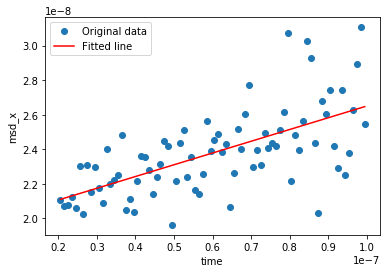

In [30]:
plt.plot(time, msd_x, 'o', label='Original data', markersize=6)
plt.plot(time, m*time + c, 'r', label='Fitted line')
plt.legend()
plt.xlabel("time")
plt.ylabel("msd_x")
plt.show()

In [31]:
def fit(time, msd, std):
    """ Helper function to get the slope of a msd curve with given errors."""
    # Setup the properly weighted least square fit problem.
    A = np.vstack([time, np.ones(len(time))]).T
    A = np.vstack([A[:,0]/std, A[:,1]/std]).T
    covariance = np.linalg.inv(np.dot(A.T,A))
    b = msd / std

    # Make the fit.
    fit = np.linalg.lstsq(A, b)

    # Get the diffusion coefficient and offset.
    D,offset  = fit[0]
    return D

In [32]:
fit(time, msd_x, std_x)

/Users/AikRui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


0.05994562510401383